# Übung

Nach DIN 1946-6 sind Türen mit einer Überströmöffnung zu versehen. Das ist erforderlich, damit die Luft auch bei geschlossenen Türen von den Zulufträumen zu den Ablufträumen strömen kann.

Die Überströmöffnung wird meist durch Kürzung des Türspalts um einen bestimmten Betrag sichergestellt. Nach DIN 1946-6 ist die folgende Tabelle einzuhalten:

Luftmenge<br>Tür mit Dichtung | $\frac{m^3}{h}$ | 10 | 20 | 30 | 40 | 50 | 60 | 70 | 80 | 90 | 100
------------------------------|-----------------|----|----|----|----|----|----|----|----|----|----
Überströmfläche               | $cm^2$          | 25 | 50 | 75 | 100|125 |150 |175 |200 | 225| 250
Kürzungsmaß                   | $mm$            |  3 |  6 |  8 | 11 | 14 | 17 | 20 | 22 | 25 | 28

- Berechnen Sie die lichten Breiten der Tür
- berechnen Sie die Strömungsgeschwindigkeiten $v$ der Luft im Türspalt,
- stellen Sie die Überströmfläche und das Kürzungsmaß jeweils in einem Diagramm dar, wobei die $x$-Achse der Volumenstrom in $\frac{m^3}{h}$ ist.

In [1]:
# pandas ist die Bibliothek für DataFrames (Tabellen)
import pandas as pd

# numpy ist die Bibliothek für numerisches rechnen (num py)
import numpy as np

# matplotlib wird zum Plotten benötigt
import matplotlib.pyplot as plt, matplotlib.ticker as tk
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.DataFrame(
    {'dV_tuer': np.arange(10,101,10), 
     'A_tuer': np.arange(25,251,25,),
     'k_tuer': [3,6,8,11,14,17,20,22,25,28]
    }
)
df

,dV_tuer,A_tuer,k_tuer
0,10,25,3
1,20,50,6
2,30,75,8
3,40,100,11
4,50,125,14
5,60,150,17
6,70,175,20
7,80,200,22
8,90,225,25
9,100,250,28


- Lichte Breiten der Tür:

Diese werden nicht in den Dataframe `df` integriert, weil schon bekannt ist, dass diese Größen nicht sinnvoll sind:

In [3]:
df_b_tuer = pd.DataFrame({
    'A_tuer': df.A_tuer,
    'k_tuer': df.k_tuer,
    'b_tuer': df.A_tuer*100/df.k_tuer
})
df_b_tuer

,A_tuer,k_tuer,b_tuer
0,25,3,833.333333
1,50,6,833.333333
2,75,8,937.500000
3,100,11,909.090909
4,125,14,892.857143
5,150,17,882.352941
6,175,20,875.000000
7,200,22,909.090909
8,225,25,900.000000
9,250,28,892.857143


Realistischer ist es, von der Breite `b = 900 # mm` ausgehend die Kürzungsmaße zu berechnen (`df.k_ber`) und mit den Werten zu vergleichen, die in der Tabelle angegeben sind:

- Berechnung der Strömungsgeschwindigkeit im Luftspalt:

In [4]:
b = 900 # mm
df['k_ber'] = df.A_tuer*100/b
df['v_tuer'] = df.dV_tuer/3600/(df.A_tuer/1e4)
df

,dV_tuer,A_tuer,k_tuer,k_ber,v_tuer
0,10,25,3,2.777778,1.111111
1,20,50,6,5.555556,1.111111
2,30,75,8,8.333333,1.111111
3,40,100,11,11.111111,1.111111
4,50,125,14,13.888889,1.111111
5,60,150,17,16.666667,1.111111
6,70,175,20,19.444444,1.111111
7,80,200,22,22.222222,1.111111
8,90,225,25,25.000000,1.111111
9,100,250,28,27.777778,1.111111


Die Strömungsgeschwindigkeit ist im eine Konstante und beträgt etwa $1.1\,\frac{m}{s}$

Diagramm mit Überströmfläche und Kürzungsmaß:

[Text(0.5, 0, 'Volumenstrom in $\\left[\\dfrac{m^3}{h}\\right]$')]

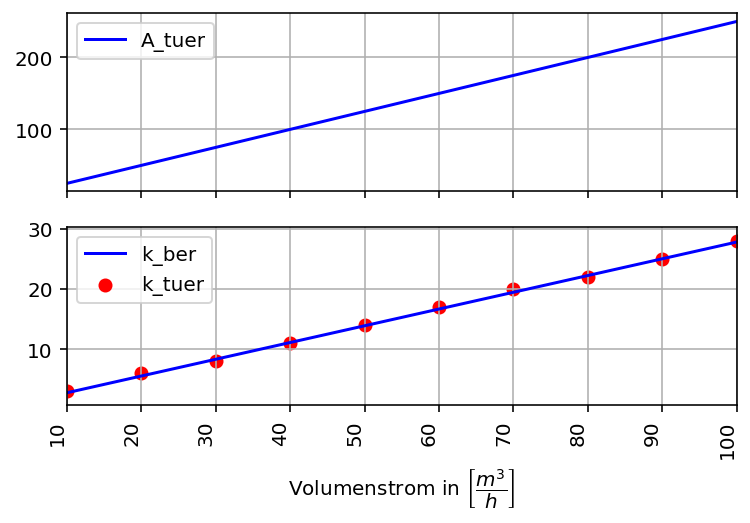

In [5]:
ax = df.set_index('dV_tuer')[['A_tuer','k_ber']]\
    .plot(subplots=True,
          color=['b','b'],
          grid=True,
          rot=90,
    )
ax[1].scatter(df.dV_tuer,df.k_tuer,c='r',label='k_tuer')
ax[1].legend(loc='best')
ax[1].set(xlabel=r'Volumenstrom in $\left[\dfrac{m^3}{h}\right]$')

Weitere Berechnungen sind einfach möglich, zum Beispiel:

- Die Berechnung des dynamischen Drucks $p_\text{dyn}$ nach der Formel

$$
  p_\text{dyn} = \dfrac{\varrho}{2}\,v^2
$$

- Die Berechnung des hydraulischen Durchmessers $d_h$ nach der Formel

$$
  d_h = \dfrac{4\,A}{U} = 2\,\dfrac{a\,b}{a+b} \quad\text{für ein Rechteck mit den Maßen $a\times b$}
$$

- Die Berechnung des Druckgefälles $R$ nach der Formel

$$
  R = \dfrac{\lambda}{d_h}\,p_\text{dyn}
$$

In [6]:
rho = 1.2 # kg/m**3
df['p_dyn'] = rho/2*df.v_tuer**2 # dynaischer Druck in Pa

b = 900
df['d_h'] = 2*df.k_ber*b/(df.k_ber+b) # hydraulischer Durchmesser in mm

lbda = 0.02 # Rohrreibungszahl lambda, näherungsweise konstant
df['R'] = lbda/(df.d_h/1000)*df.p_dyn # Druckgefälle in Pa/m
df

,dV_tuer,A_tuer,k_tuer,k_ber,v_tuer,p_dyn,d_h,R
0,10,25,3,2.777778,1.111111,0.740741,5.538462,2.674897
1,20,50,6,5.555556,1.111111,0.740741,11.042945,1.341564
2,30,75,8,8.333333,1.111111,0.740741,16.513761,0.897119
3,40,100,11,11.111111,1.111111,0.740741,21.951220,0.674897
4,50,125,14,13.888889,1.111111,0.740741,27.355623,0.541564
5,60,150,17,16.666667,1.111111,0.740741,32.727273,0.452675
6,70,175,20,19.444444,1.111111,0.740741,38.066465,0.389183
7,80,200,22,22.222222,1.111111,0.740741,43.373494,0.341564
8,90,225,25,25.000000,1.111111,0.740741,48.648649,0.304527
9,100,250,28,27.777778,1.111111,0.740741,53.892216,0.274897


Weil der hydraulische Durchmesser mit zunehmendem Kürzungsmaß $k$ immer größer wird, nimmt das Druckgefälle $R$ mit zunehmendem Volumenstrom $\dot V$ stark ab.

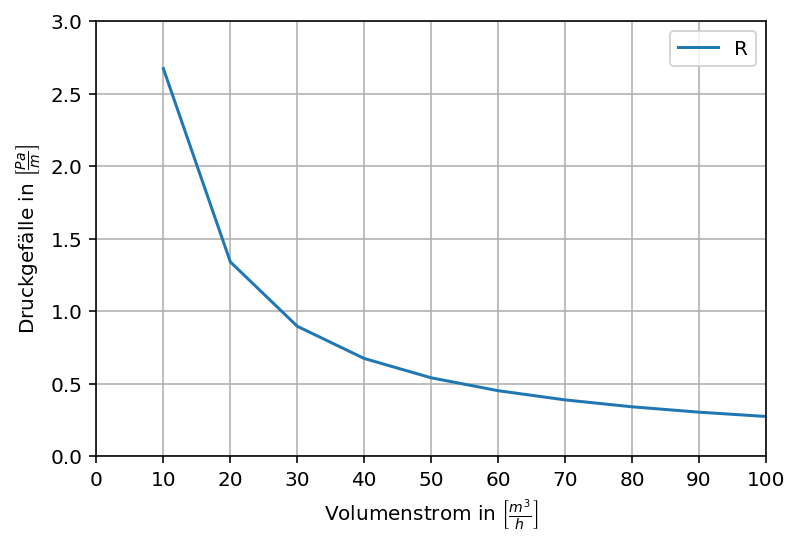

In [7]:
ax = df.plot(x = 'dV_tuer',y='R')

ax.grid()
ax.set(ylim=(0,3),xlim=(0,100),
       xlabel=r'Volumenstrom in $\left[\frac{m^3}{h}\right]$',
       ylabel=r'Druckgefälle in $\left[\frac{Pa}{m}\right]$'
      );
ax.xaxis.set_major_locator(tk.MultipleLocator(10))